In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn as sk
import sklearn.datasets as sk_ds
import sklearn.decomposition as dec

In [2]:
%matplotlib inline

## Graphical shortening
[Q] - Question

[A] - Answer


### [Q] About what this notebook?
[A] This notebook is devoted to explain and visualize Principal component analysis based on covariance matrix. Before the explaining I have tried to explain Covariance matrix and Singular Value Decomposition. 

If you have noticed any mistake I would be glad if you point the mistake out. 

### [Q] What is Covariance matrix?

[A] You can thing of covariance matrix as a pivot table. Every row reperesnt covariance between a feature in the row and every other features. 

[Q] What is covariance? 
[A] Covariance it's a number that shows whether variables are increases(decrease) (covariance positive) or one of the variables decrease and the other increase (covariance negative).

![title](img/covariance.png)

Formula: $$\frac{\sum_i\big[(var1_i-E[var1])\cdot(var2_i-E[var2])\big]}{n-1}$$

Where $var1$ and $var2$ are some features (random variables);

$n$ - number of observation

$E(var)$ - expected value (mean)


My intuition behind covariance is to watch for the variables to be on the same side of their mean value most of the time. If $var1_i$ lesser or greater than $E(var1)$ and corresponding $var2_i$ lesser or greater than $E(var2)$ and this happens most of the observation, then covariance of the varibles will be positive.   

In [3]:
# function that returns covariance between two variables (only vectors)
def covariance(var1, var2):
    if var1.shape[0]==var2.shape[0]:
        cov = np.divide(np.multiply(var1-var1.mean(),
                                    var2-var2.mean()).sum(),
                        var1.shape[0]-1)
    else:
        raise ValueError('Size of vectors must be equal')
    return cov

Text(0.5,1,'Second Data\n Covariance = 18.59\nPositive')

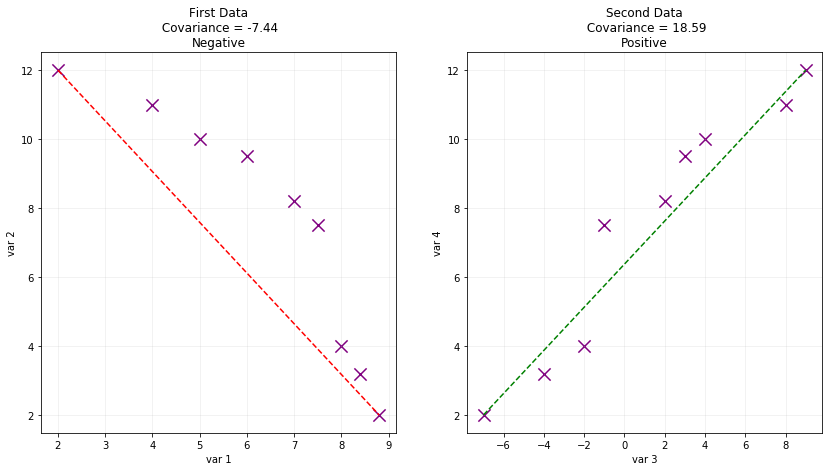

In [4]:
# testing covariance function
# testing data 1 
data_neg_covariance = np.array([[2,4,5,6,7,7.5,8,8.4,8.8], # var 1
                                [12,11,10,9.5,8.2,7.5,4,3.2,2]]) # var 2
# making visualization

#creating plots
f,(ax1,ax2)=plt.subplots(1,2,figsize=(14,7))


# visualizing covariance betwee var 1 and var 2 
ax1.scatter(data_neg_covariance[0,:],data_neg_covariance[1,:],
            s=150, color= 'purple', marker='x')
ax1.plot([2, 8.8],[12, 2],
         color = 'red', linestyle='--',)
ax1.set_xlabel('var 1')
ax1.set_ylabel('var 2')
ax1.grid(alpha=0.2)
ax1.set_title('First Data\n Covariance = {0:.2f}\nNegative'.format(
    covariance(data_neg_covariance[0,:],
               data_neg_covariance[1,:]
              ))
             )

# testing data 2
data_pos_covariance = np.array([[9,8,4,3,2,-1,-2,-4,-7], # var 3
                                [12,11,10,9.5,8.2,7.5,4,3.2,2]]) # var 4

# visualizing covariance betwee var 1 and var 2 
ax2.scatter(data_pos_covariance[0,:], data_pos_covariance[1,:], # here I'm reversing the vector
            s=150, color= 'purple', marker='x')
ax2.plot([-7, 9],[2, 12],
         color = 'green', linestyle='--',)
ax2.set_xlabel('var 3')
ax2.set_ylabel('var 4')
ax2.grid(alpha=0.2)
ax2.set_title('Second Data\n Covariance = {0:.2f}\nPositive'.format(
    covariance(data_pos_covariance[0,:],
               data_pos_covariance[1,:]
              ))
             )


### [Q] What is Singular Value Decomposition (SVD)?
[A]
Singular Value Decomposition (SVD) - is a method of decomposing a matrix. 

$$A = U\Sigma V^T$$

A(m x n) -  matrix

U(mxm) - matrix of eugenvectors of $AA^T$

V(nxn) - matrix of eugenvectors of $A^TA$

$\Sigma$ - diagonal matrix of square roots of nonzero eigenvalues of both $A^TA$ and $AA^T$. 

![svd.png](img/svd.png)

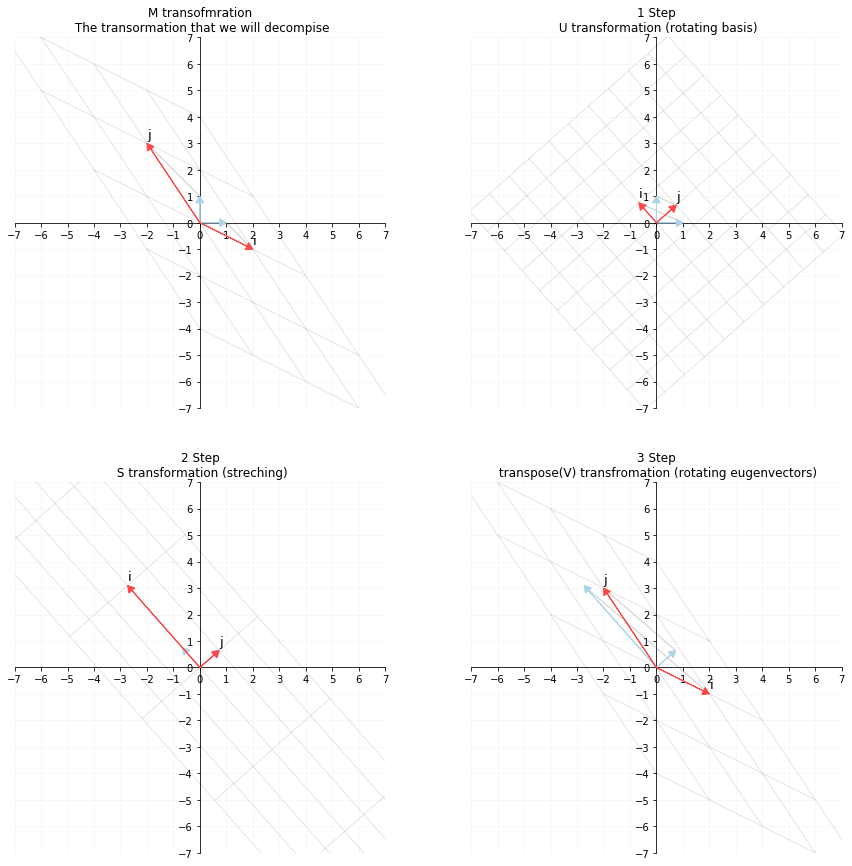

In [5]:
import visualization # This module is used to visulize space transformation and change of a basis. 
# If you're intrested in realization you should check that out (the module is kind of messy btw)


f, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(15,15))

#origin 
origin = np.array([[0,0],
                   [0,0]])

# basis 
basis= np.array([[1,0],
                 [0,1]])

# some transformation M
M = np.array([[2,-2],
              [-1,3]])

[U,S,V] = np.linalg.svd(M)

#color pallete
color_p1 = {'bt':'#aed4e8',   # before transformation
            'edbt':'#86a6b7', # edge color
            'at':'#ff4747',   # after transformation
            'edat':'#9b2626', # edge color
            'pv':'#5988ff',   # points visualization color
            'pve':'#375dbf',  # points edge color
            'tl':'#595959',   # line color 
            'ada':'#bccc12',   # additional vector color
           } # color of line 

# first axes
n_t = visualization.visualize_transfromation(ax1,basis,M,'M transofmration\n The transormation that we will \
decompise', color_p1)
visualization.draw_transformed_grid(ax1,M,gridsize=(-2,2))

# second axes
buff = visualization.visualize_transfromation(ax2,basis,U,
                                              '1 Step\n U transformation (rotating basis)',
                                              color_p1)
visualization.draw_transformed_grid(ax2,buff,gridsize=(-5,5))                                             

# third axes
buff = visualization.visualize_transfromation(ax3,buff,np.diag(S),
                                              '2 Step\n S transformation (streching)',
                                             color_p1)
visualization.draw_transformed_grid(ax3,buff,gridsize=(-3,3))   

# fourth axes
buff = visualization.visualize_transfromation(ax4,buff,np.transpose(V),
                                              '3 Step\n transpose(V) transfromation (rotating eugenvectors)',
                                              color_p1)
visualization.draw_transformed_grid(ax4,buff,gridsize=(-2,2))

### PCA
[Q] What is PCA?

[A] PCA - dimensional reduction tool. PCA has many applications. 

We take covariance matrix of data and then decompose it by SVD. We take U transformation from the decomposition and then applying it on data. Then we projecting the data on one of the axis. 

$$A = \underline{\textbf{U}}\Sigma V^T$$


After data transfromation you can think of the axis as principal components.



To create a covariance matrix we will use np.cov

To decompose matrix we will use np.linalg.svd


In [6]:
#Here I'm using sklearn make classification function to create random data
#If you want to test another set of random data you should change the value assigned to the "random state" keyword 
X_data, y_data = sk_ds.make_classification(n_samples=15,random_state=20,
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_repeated=0,
                                       n_classes=2,
                                       n_clusters_per_class=1,
                                    )

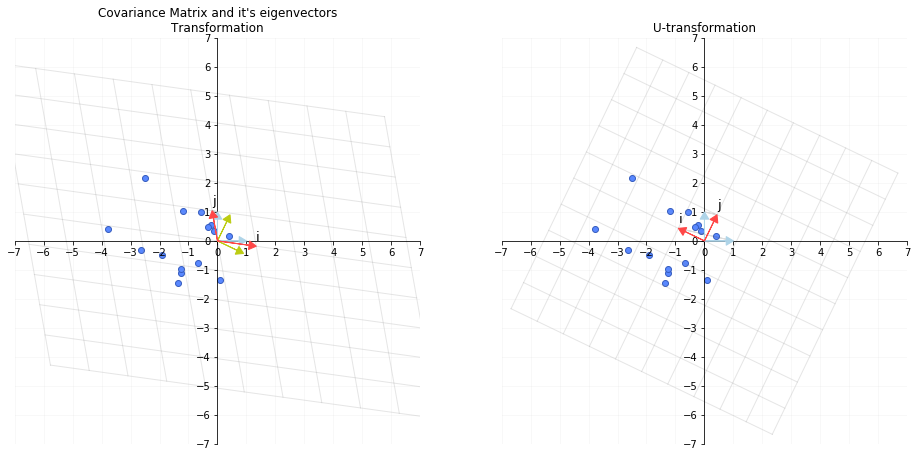

In [7]:
# Here we decompose matrix on 3 transformations
[U,S,V] =np.linalg.svd(np.cov(X_data, rowvar=False))

# Only U-transfomation is what we instrested in
# Changing basis of the data. 
t_m = np.matmul(U,np.transpose(X_data))

f,[ax1,ax2]=plt.subplots(1,2,figsize=(16,8))

visualization.visualize_transfromation(ax1,basis,np.cov(X_data, rowvar=False),'Covariance Matrix and it\'s eigenvectors\
\nTransformation',color_p1)
visualization.visualize_transfromation(ax2,basis,U,'U-transformation',color_p1)

#eigen vectors visualization
visualization.draw_arrows(ax1, origin, np.linalg.eig(np.cov(X_data,rowvar=False))[1], color=color_p1['ada'],
                                 zorder=20,alpha=1,label='Eigen Vectors',w_coef=1, mark_text=False)
for ax in [ax1,ax2]:
    ax.scatter(X_data[:,0], X_data[:,1],color=color_p1['pv'], edgecolors=color_p1['pve'])


visualization.draw_transformed_grid(ax2,U)
visualization.draw_transformed_grid(ax1,np.cov(X_data, rowvar=False))

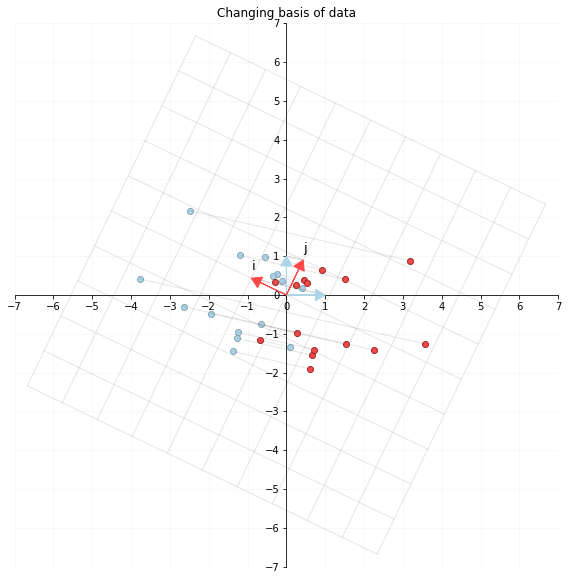

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

origin = np.array([[0,0],[0,0]])

visualization.prepareax(ax,[-4,4],[-4,4])

visualization.visualize_transfromation(ax, basis, U,'Changing basis of data',color_p1)

visualization.draw_line_points_change(ax, X_data, np.transpose(t_m), color_p1, linestyle='-')
#plotting data before change of the basis
ax.scatter(X_data[:,0],X_data[:,1], color=color_p1['bt'], edgecolors=color_p1['edbt'])

#after 
ax.scatter(t_m[0,:],t_m[1,:], color=color_p1['at'], edgecolors=color_p1['edat'])

visualization.draw_transformed_grid(ax,U)

### Remark
After changing the basis we can project data on any of axis (principal component). 
Next visualization should give you more intuition what is happening on projection.

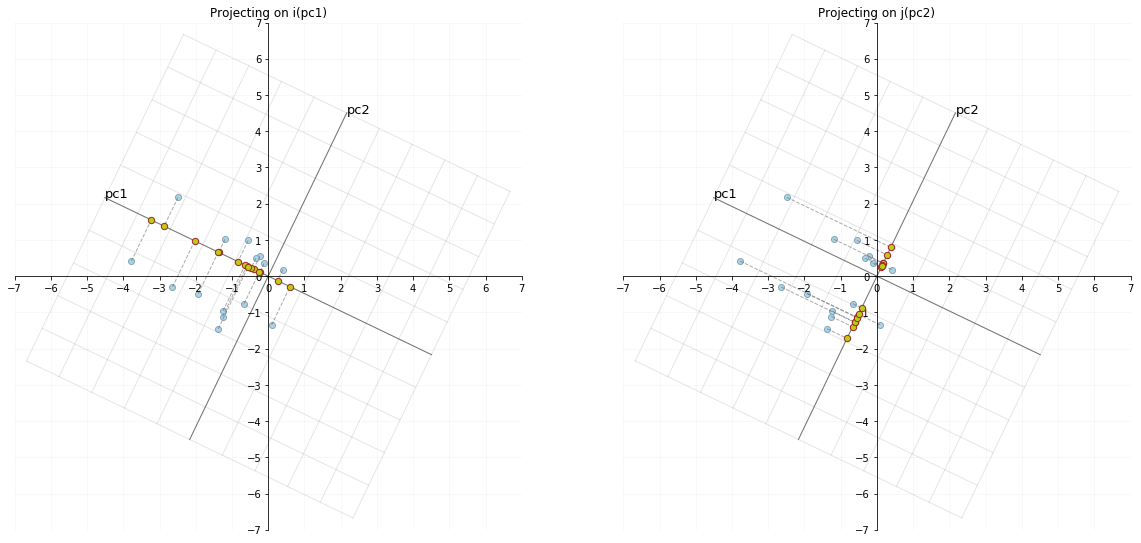

In [9]:
t_proj_on_x = U[:,0].reshape(2,1)*np.transpose(t_m[0,:].reshape(t_m.shape[1],1))
t_proj_on_y = U[:,1].reshape(2,1)*np.transpose(t_m[1,:].reshape(t_m.shape[1],1))

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,10))

origin = np.array([[0,0],[0,0]])


for ax in [ax1,ax2]:
    visualization.prepareax(ax)
    ax.scatter(X_data[:,0],X_data[:,1], color=color_p1['bt'], edgecolors=color_p1['edbt'])
    visualization.draw_transformed_grid(ax,U)
    visualization.draw_transformed_axis(ax,U,names=['pc1','pc2'],alpha=0.5)


ax1.set_title('Projecting on i(pc1)')
ax2.set_title('Projecting on j(pc2)')

    
visualization.draw_line_points_change(ax1, X_data, np.transpose(t_proj_on_x), color_p1, alpha=0.5)
visualization.draw_line_points_change(ax2, X_data, np.transpose(t_proj_on_y), color_p1, alpha=0.5)

ax1.scatter(t_proj_on_x[0,:],t_proj_on_x[1,:], color=color_p1['ada'], edgecolors=color_p1['edat'],zorder=11,s=40)
ax2.scatter(t_proj_on_y[0,:],t_proj_on_y[1,:], color=color_p1['ada'], edgecolors=color_p1['edat'],zorder=11,s=40)



# PCA results

After transfoming data we project it on one of principal components

<Figure size 720x720 with 0 Axes>

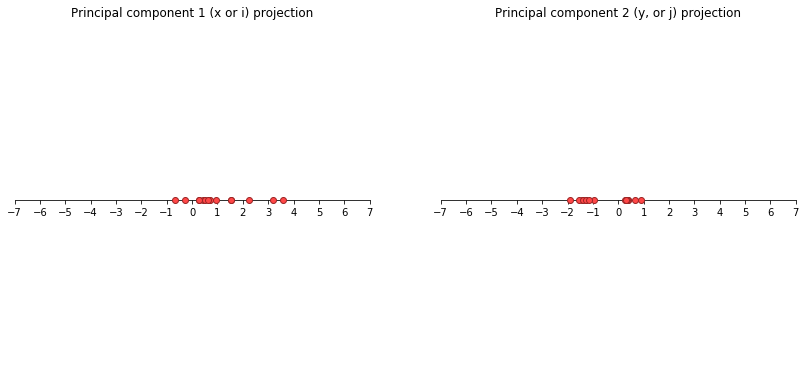

In [10]:
#you should add explaining here
plt.figure(figsize=(10,10))

f, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))
for ax in [ax1,ax2]:
    visualization.prepareax(ax)
    del ax.spines['left']
    ax.tick_params(
    axis='y',          
    which='both',  
    left=False,        
    labelleft=False) 
    ax.grid(0)
    
ax1.set_title('Principal component 1 (x or i) projection')
ax1.scatter(t_m[0,:],np.zeros(t_m.shape[1]), color=color_p1['at'], edgecolors=color_p1['edat'],zorder=100)

ax2.set_title('Principal component 2 (y, or j) projection')
ax2.scatter(t_m[1,:],np.zeros(t_m.shape[1]),color=color_p1['at'], edgecolors=color_p1['edat'],zorder=100)